In [7]:
import matplotlib.pyplot as plt
import json

create_coda_root = f'/fzi/ids/ju878/model_contradictions/create_coda/'
annotation_validation = f'{create_coda_root}annotation_validation'

coda_root = '/disk/ml/own_datasets/CODA/'
json_cornercases = coda_root + 'corner_case.json'

with open(annotation_validation, 'r') as f:
    anno_valid = f.read().splitlines()
    
with open(json_cornercases, 'r') as f:
    data_cornercases = json.load(f)
    
categories = data_cornercases['categories']
annotations = data_cornercases['annotations']


In [8]:
counts_total = [0,0,0,0,0,0,0,0,0]
counts_once = [0,0,0,0,0,0,0,0,0]
counts_kitti = [0,0,0,0,0,0,0,0,0]
counts_nuscenes = [0,0,0,0,0,0,0,0,0]
for index_c, count in enumerate(counts_total):
    for index_a, anno in enumerate(anno_valid):
            
        if f'{index_c + 1}' == anno:
            if index_a <= 4413:
                counts_once[index_c] += 1
            elif index_a >= 4813:
                counts_nuscenes[index_c] += 1
            else:
                counts_kitti[index_c] += 1
            counts_total[index_c] += 1

print(counts_once)
print(sum(counts_once))
print(counts_kitti)
print(sum(counts_kitti))
print(counts_nuscenes)
print(sum(counts_nuscenes))
print(counts_total)
print(sum(counts_total))

[839, 443, 2496, 48, 400, 58, 1, 36, 92]
4413
[90, 128, 142, 2, 25, 1, 1, 8, 2]
399
[110, 382, 103, 6, 123, 359, 0, 35, 6]
1124
[1039, 953, 2741, 56, 548, 418, 2, 79, 100]
5936


In [9]:
supercategories = ['pedestrian', 'cyclist', 'vehicle', 'animal', 'traffic_facility', 'obstruction', 'misc']
counts_supercategorie = [[0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0]]
for index_c, count in enumerate(counts_total):
    for index_a, anno in enumerate(anno_valid):
        if f'{index_c + 1}' == anno:
            for annotation in annotations:
                if index_a == annotation['id']:
                    for categorie in categories:
                        if annotation['category_id'] == categorie['id']:
                            for index_sc, sc in enumerate(supercategories):
                                if categorie['supercategory'] == sc:
                                    counts_supercategorie[index_sc][index_c] += 1
                                       

In [13]:

anno_description = [
    'DB-Scan',
    'Meanshift',
    'both',
    'mix',
    'DB-Scan wrong cluster',
    'wrong clustering',
    'wrong annotation',
    'Meanshift wrong Cluster',
    'clustering too fine',
]

def plotgraph(counts, labels, title):
    # Create a pie plot
    fig, ax = plt.subplots(figsize=(8, 10))
    ax.pie(counts, labels=labels, autopct='%1.1f%%')

    # Set plot title
    ax.set_title(f'{title} - {sum(counts)}')

    # Display the plot
    plt.show()
    fig.savefig(f'/disk/no_backup/ju878/model_contradictions/create_coda/graphics/manual_evaluation_{title}.svg', format='svg', dpi=1200)
    plt.close()
    
def my_autopct(pct):
    return ('%.1f' % pct) if pct > 3 else ''

def plotgraphs(counts, labels, titles):
    
    fig = plt.figure(figsize=(12, 7), tight_layout=False)
    ax1 = fig.add_subplot(121)
    ax1.pie(counts[0], labels=labels, autopct=my_autopct)
    ax1.set_title(f'{titles[0]} - {sum(counts[0])}')
    
    ax2 = fig.add_subplot(322)
    ax2.pie(counts[1], autopct=my_autopct)
    ax2.set_title(f'{titles[1]} - {sum(counts[1])}')
                  
    ax3 = fig.add_subplot(324)
    ax3.pie(counts[2], autopct=my_autopct)
    ax3.set_title(f'{titles[2]} - {sum(counts[2])}')
    
    ax4 = fig.add_subplot(326)
    ax4.pie(counts[3], autopct=my_autopct)
    ax4.set_title(f'{titles[3]} - {sum(counts[3])}')
    plt.show()
    fig.savefig(f'/disk/no_backup/ju878/model_contradictions/create_coda/graphics/manual_evaluation_overview.svg', format='svg', dpi=1200)
    plt.close()
    
    

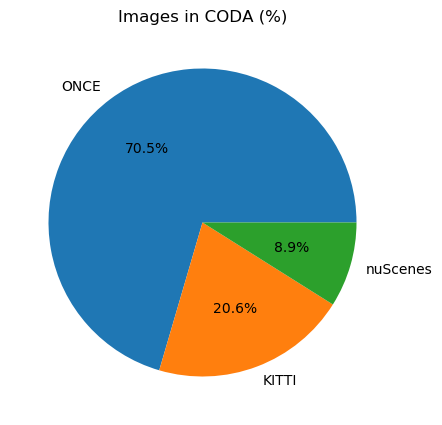

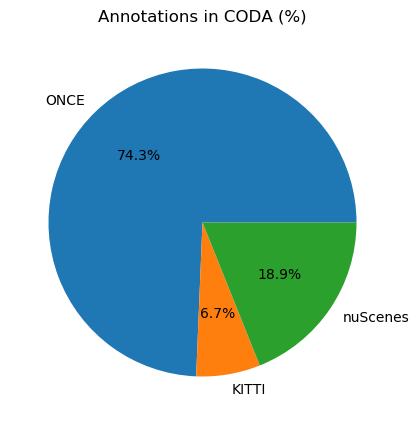

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie([1057, 309, 134], labels=['ONCE', 'KITTI', 'nuScenes'], autopct='%1.1f%%')
ax.set_title(f'Images in CODA (%)')
plt.show()
fig.savefig(f'/disk/no_backup/ju878/model_contradictions/create_coda/graphics/images_in_CODA.svg', format='svg', dpi=1200)
plt.close()

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie([4413, 399, 1124], labels=['ONCE', 'KITTI', 'nuScenes'], autopct='%1.1f%%')
ax.set_title(f'Annotations in CODA (%)')
plt.show()
fig.savefig(f'/disk/no_backup/ju878/model_contradictions/create_coda/graphics/annotations_in_CODA.svg', format='svg', dpi=1200)
plt.close()

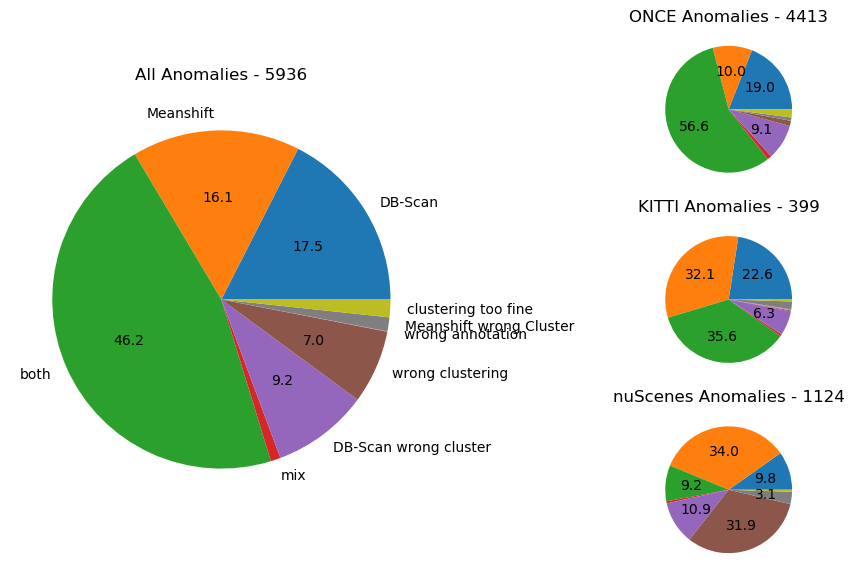

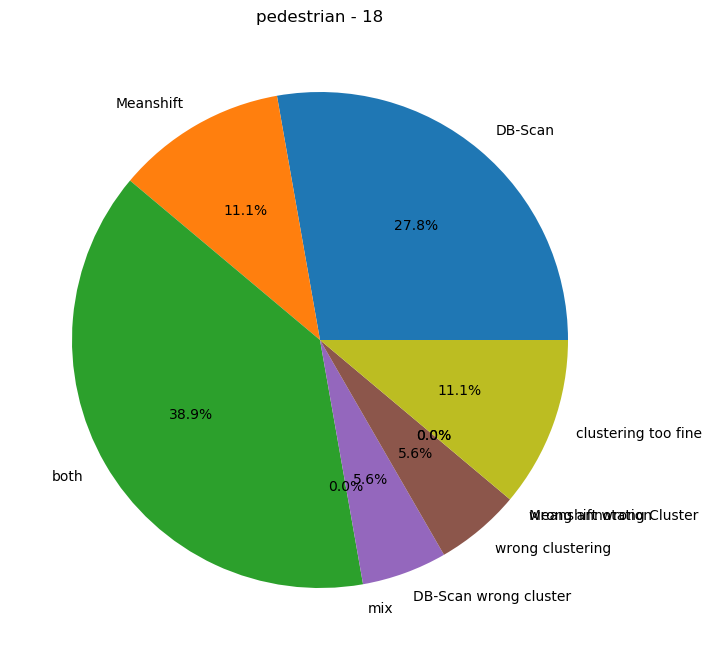

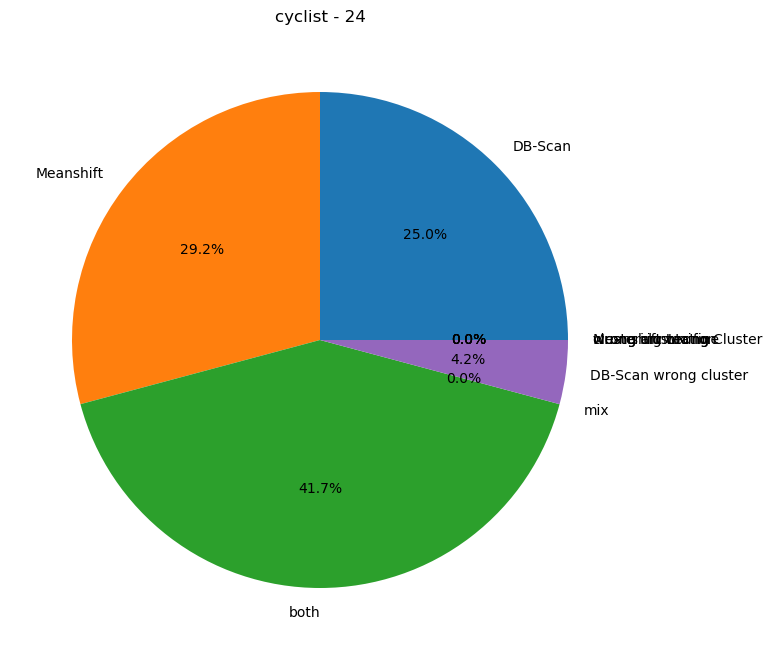

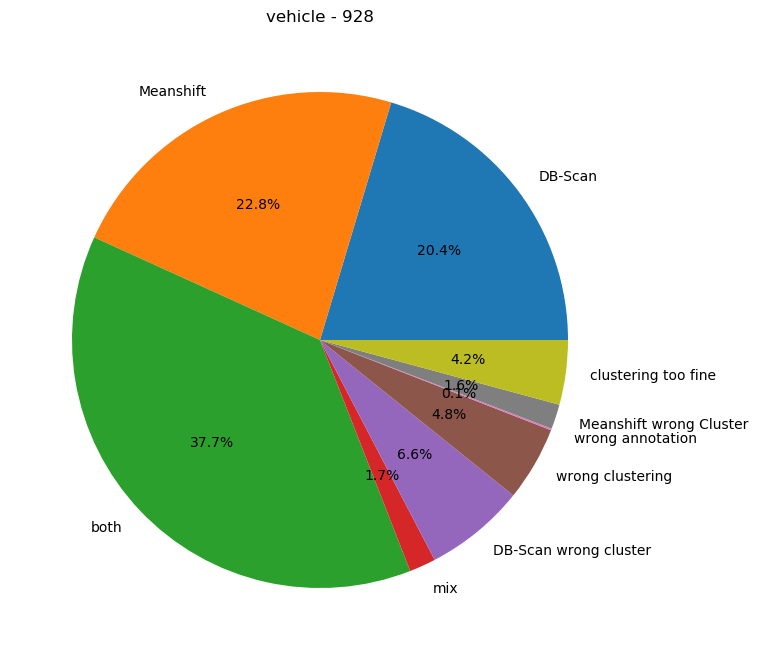

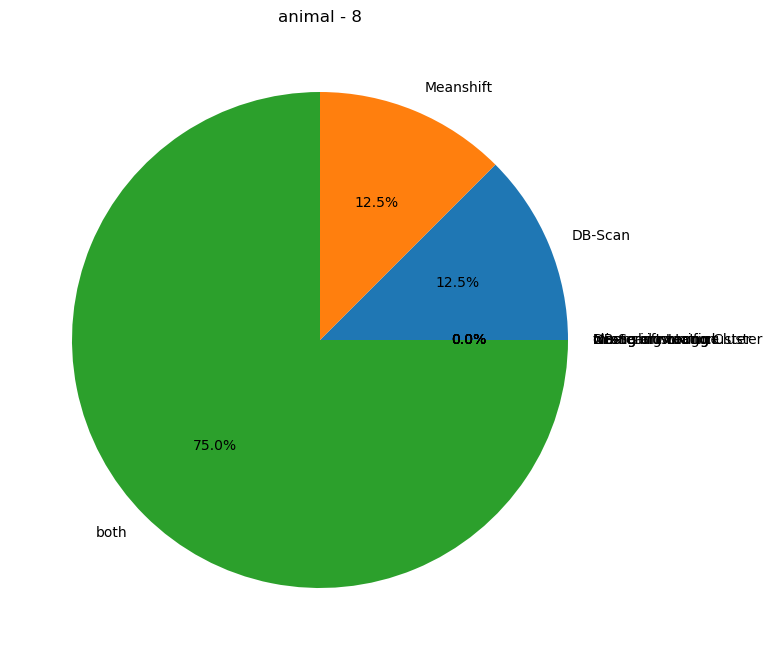

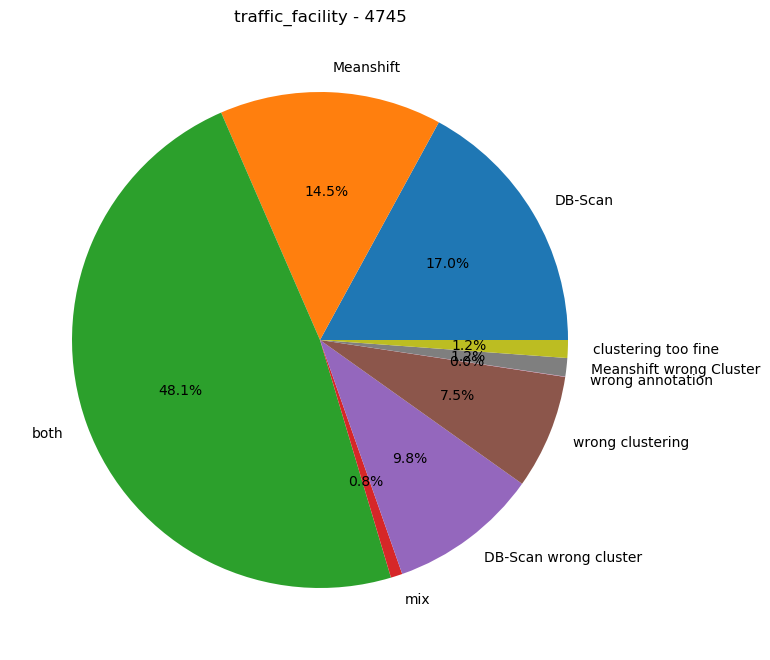

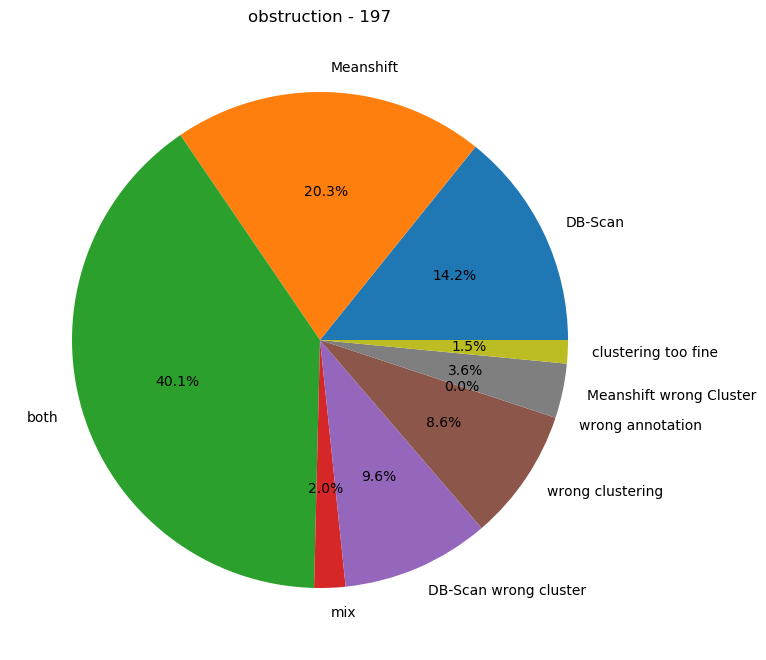

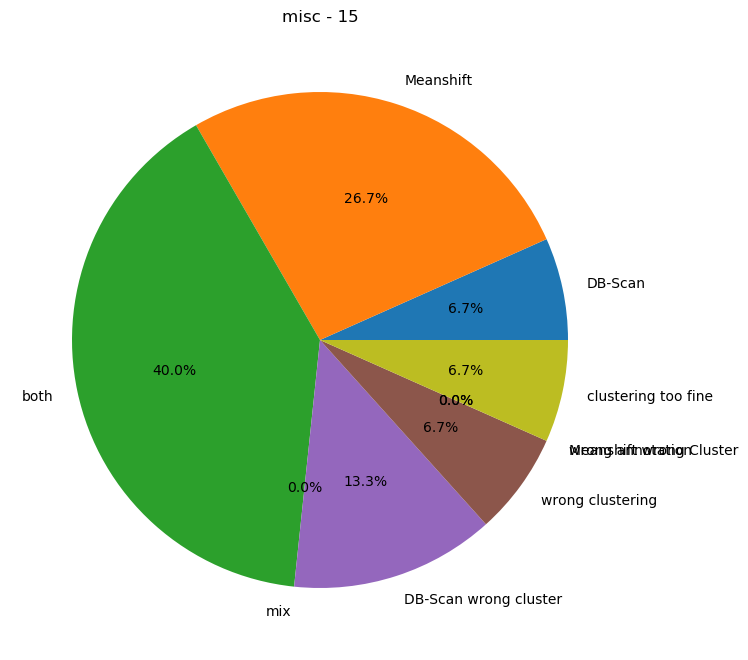

In [14]:
titles = ['All Anomalies', 'ONCE Anomalies', 'KITTI Anomalies', 'nuScenes Anomalies']
counts = [counts_total, counts_once, counts_kitti, counts_nuscenes]
labels = [anno_description, anno_description, anno_description, anno_description]
#plotgraph(counts_total, anno_description, 'Total Counts')
#plotgraph(counts_once, anno_description, 'ONCE Counts')
#plotgraph(counts_kitti, anno_description, 'Kitti Counts')
#plotgraph(counts_nuscenes, anno_description, 'NuScenes Counts')
plotgraphs(counts, anno_description, titles)
for index, supercategorie in enumerate(counts_supercategorie):
    plotgraph(supercategorie, anno_description, supercategories[index])